In [1]:
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as pl
%matplotlib inline

simple sinusoidal model
===

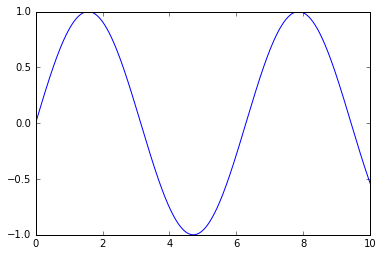

In [2]:
true = [1, 1, 0]
x = np.linspace(0, 10, 1000)
def simple_sine(theta, x):
    a, b, c = theta
    return a * np.sin(b * x + c)
pl.plot(x, simple_sine(true, x))

add noise
==

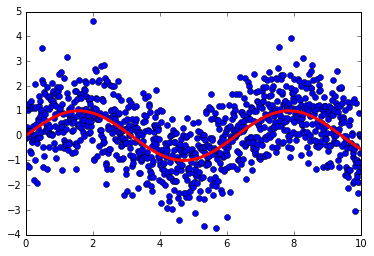

In [3]:
y = simple_sine(true, x) + np.random.randn(x.size)
pl.plot(x, y, 'o')
pl.plot(x, simple_sine(true, x),'r-', lw=3)

histogram of 'residuals'
==

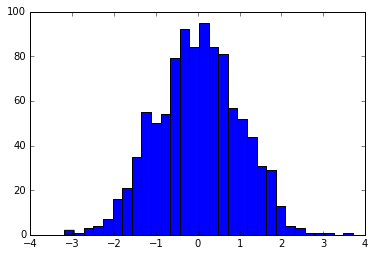

In [4]:
f = pl.hist(y - simple_sine(true, x), bins=30) 

Nelder-Mead
==

In [5]:
def objective(theta, x, y):
    model = simple_sine(theta, x)
    return np.sum((model - y)**2)

initial = [0.5] * 3
opt = op.minimize(objective, initial, args=(x,y), method='nelder-mead')
for p in opt.x:
    print opt.success
    print "parameter optimum: {}".format(p)

True
parameter optimum: 1.0196577511
True
parameter optimum: 0.987990521609
True
parameter optimum: 0.0603231041961


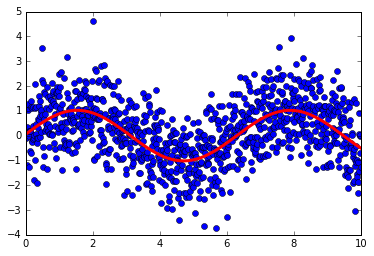

In [6]:
pl.plot(x, y, 'o')
pl.plot(x, simple_sine(opt.x, x),'r-', lw=3)

Levenberg-Marquardt
==

In [7]:
h = lambda x,a,b,c: a*np.sin(b*x+c)
mu, cov = op.curve_fit(h, x, y, p0=initial)
sig = np.sqrt(np.diag(cov))
for i,j in zip(mu, sig):
    print "parameter optimum: {} +/- {}".format(i, j)

parameter optimum: -9.25472465164 +/- 218021.411029
parameter optimum: -0.00105119705539 +/- 25.3440751287
parameter optimum: 3.16735710046 +/- 621.041664366


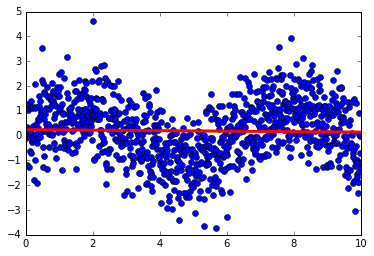

In [8]:
pl.plot(x, y, 'o')
pl.plot(x, h(x, *mu),'r-', lw=3)

...not quite as robust to bad initial guesses, apparently
==

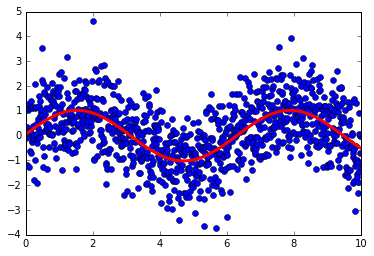

In [9]:
initial = 0.9, 0.9, 0.1
mu, cov = op.curve_fit(h, x, y, p0=initial)
sig = np.sqrt(np.diag(cov))
pl.plot(x, y, 'o')
pl.plot(x, h(x, *mu),'r-', lw=3)

that's better!
==

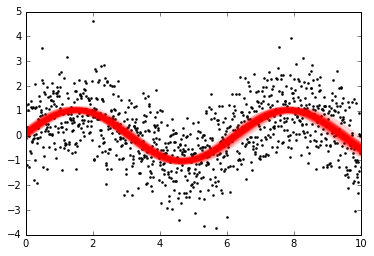

In [10]:
pl.plot(x, y, 'ko', ms=2)
for i in range(100):
    theta = mu + np.random.randn(mu.size) * sig
    pl.plot(x, h(x, *theta),'r-', lw=3, alpha=0.1)